In [1]:
import pandas as pd
import numpy as np

#### Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
#### X1 = my order was delivered on time
#### X2 = contents of my order was as I expected
#### X3 = I ordered everything I wanted to order
#### X4 = I paid a good price for my order
#### X5 = I am satisfied with my courier
#### X6 = the app makes ordering easy for me
#### Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 here the smaller number indicates less and the higher number indicates more towards the answer.

### Predict if a customer is happy or not based on the answers they give to questions asked.

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
df.isnull().sum()


Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


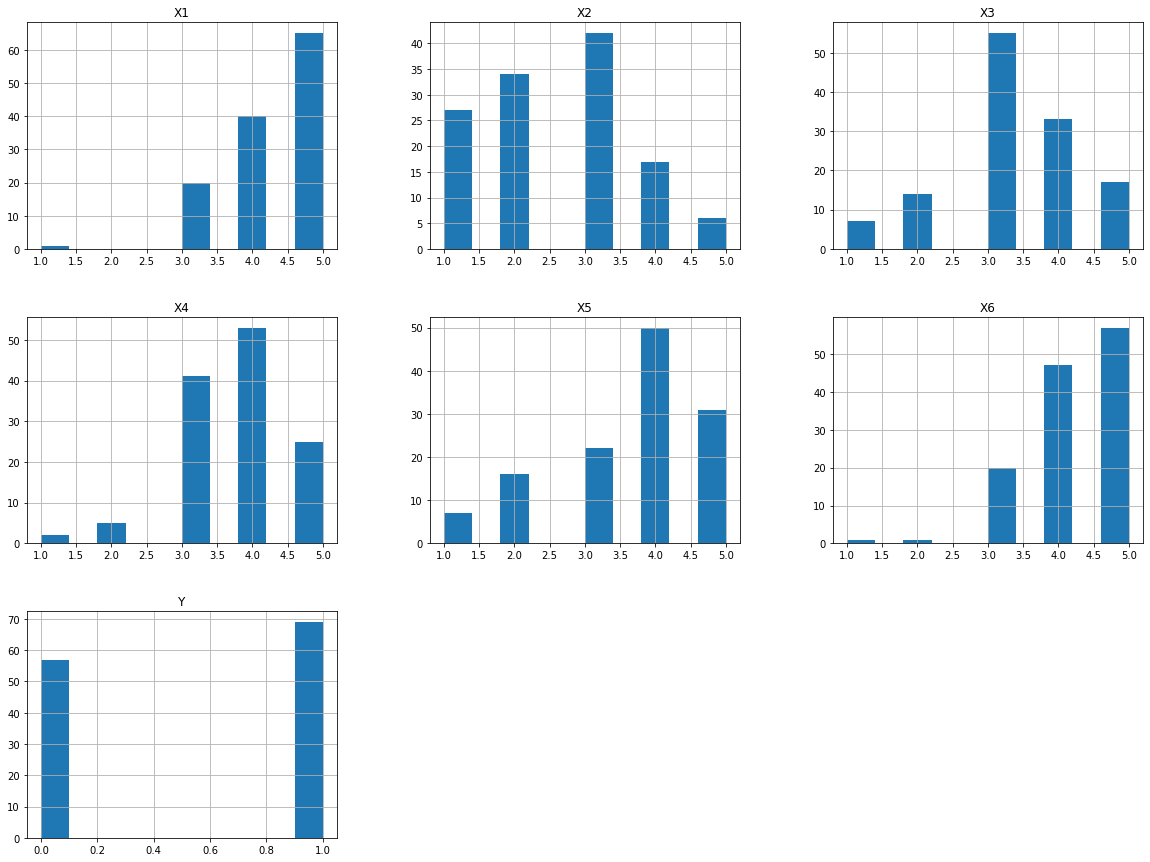

In [7]:
import matplotlib.pyplot as plt
df.hist(bins = 10 , figsize =(20,15))
plt.show()

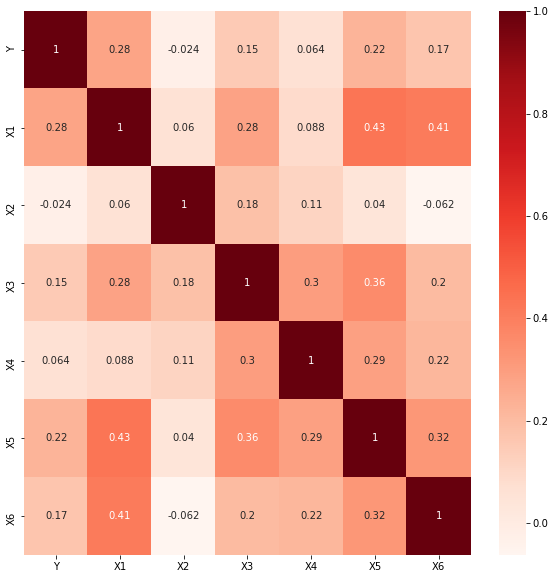

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap=plt.cm.Reds)
plt.show()

In [9]:
corr = abs(corr_matrix['Y']).sort_values(ascending=False)[1:]
corr

X1    0.280160
X5    0.224522
X6    0.167669
X3    0.150838
X4    0.064415
X2    0.024274
Name: Y, dtype: float64

In [10]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F2DA7DC70>,
      dtype=object)

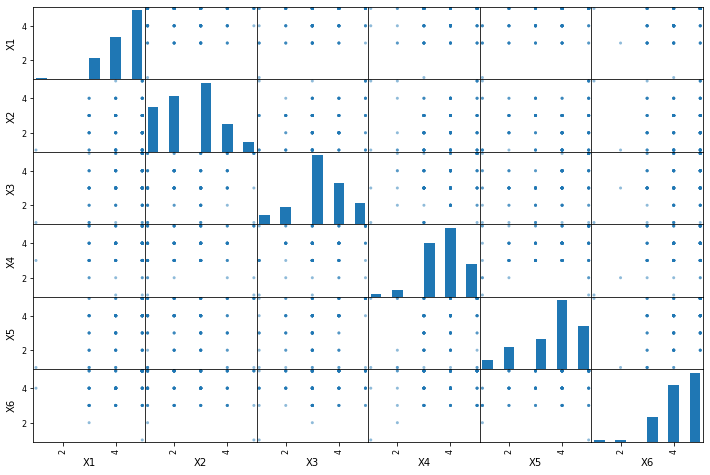

In [11]:
attributes = ['X1','X2','X3','X4','X5','X6']
scatter_matrix(df[attributes],figsize=(12,8))

In [12]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

[[1.10023921 1.67332005 0.42167606 0.30364219 0.29114981 1.44416589
  0.31506076]
 [1.10023921 1.67332005 0.47885247 0.30364219 1.43755219 0.30549663
  1.55561249]
 [0.90889326 0.83666003 0.42167606 0.30364219 0.85525257 0.56933463
  0.92549097]
 [1.10023921 0.83666003 1.32220458 0.30364219 0.85525257 0.56933463
  0.92549097]
 [1.10023921 0.83666003 1.32220458 0.30364219 0.85525257 0.56933463
  0.92549097]
 [0.90889326 0.83666003 2.22273311 0.30364219 1.43755219 1.18032789
  0.92549097]
 [1.10023921 1.67332005 1.379381   1.28464005 2.00165494 2.31899715
  1.55561249]
 [0.90889326 0.83666003 1.32220458 0.67735566 0.29114981 0.30549663
  0.92549097]
 [1.10023921 0.41833001 1.379381   0.67735566 0.29114981 0.30549663
  0.31506076]
 [1.10023921 0.41833001 1.32220458 0.67735566 2.00165494 1.18032789
  0.92549097]
 [1.10023921 1.67332005 0.47885247 0.30364219 0.85525257 1.44416589
  1.55561249]
 [1.10023921 0.41833001 1.32220458 0.30364219 0.29114981 0.30549663
  0.31506076]
 [0.90889326 0.8

In [13]:
# threshold = 3
#position of the outlier
print(np.where(z>3))

(array([ 34,  47, 119, 119], dtype=int64), array([4, 1, 4, 6], dtype=int64))


In [14]:
#remove outlier
from scipy import stats
df1 = df[(z< 3).all(axis=1)]

In [15]:
#Shape of data before and after removing outliers
print(df.shape)
print(df1.shape)

(126, 7)
(123, 7)


In [16]:
df1.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Machine Learning

In [17]:
X,y= df1.iloc[:,1:],df1.iloc[:,0:1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_mean = log_scores.mean()
y_test_pred_log = cross_val_predict(log_reg, X_test, y_test, cv=5)
print('Accuracy Score: ', accuracy_score(y_test, y_test_pred_log))
print('Precision Score: ', precision_score(y_test, y_test_pred_log))
print('Recall Score: ', recall_score(y_test, y_test_pred_log))
print('F1 Score: ', f1_score(y_test, y_test_pred_log))

Accuracy Score:  0.7317073170731707
Precision Score:  0.7307692307692307
Recall Score:  0.8260869565217391
F1 Score:  0.7755102040816326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

### KNearestNeighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()
y_test_pred_knn = cross_val_predict(knn_clf, X_test, y_test, cv=5)
print('Accuracy Score: ', accuracy_score(y_test, y_test_pred_knn))
print('Precision Score: ', precision_score(y_test, y_test_pred_knn))
print('Recall Score: ', recall_score(y_test, y_test_pred_knn))
print('F1 Score: ', f1_score(y_test, y_test_pred_knn))

Accuracy Score:  0.6097560975609756
Precision Score:  0.6
Recall Score:  0.9130434782608695
F1 Score:  0.7241379310344828


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

### Decision Tree

In [23]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
tree_mean = tree_scores.mean()
y_test_pred_dt = cross_val_predict(tree_clf, X_test, y_test, cv=5)
print('Accuracy Score: ', accuracy_score(y_test, y_test_pred_dt))
print('Precision Score: ', precision_score(y_test, y_test_pred_dt))
print('Recall Score: ', recall_score(y_test, y_test_pred_dt))
print('F1 Score: ', f1_score(y_test, y_test_pred_dt))

Accuracy Score:  0.4878048780487805
Precision Score:  0.5416666666666666
Recall Score:  0.5652173913043478
F1 Score:  0.5531914893617021


### Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=5)
grad_mean = grad_scores.mean()
y_test_pred_gb = cross_val_predict(grad_clf, X_test, y_test, cv=5)
print('Accuracy Score: ', accuracy_score(y_test, y_test_pred_gb))
print('Precision Score: ', precision_score(y_test, y_test_pred_gb))
print('Recall Score: ', recall_score(y_test, y_test_pred_gb))
print('F1 Score: ', f1_score(y_test, y_test_pred_gb))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy Score:  0.5853658536585366
Precision Score:  0.6071428571428571
Recall Score:  0.7391304347826086
F1 Score:  0.6666666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 150, 200]
}


grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid,cv=5)

grid_search.fit(X_train, y_train)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}

In [27]:
best_grid = grid_search.best_estimator_

print("Random Forest's Accuracy: ", best_grid.score(X_test, y_test))

Random Forest's Accuracy:  0.7073170731707317


### Based on the algorithims we used logistic regression gives the best accuracy. While more features generally leads to a lower error rate, it could also lead to overfitting so to prevent this, trained the model and tested the models using cross fold validation of 5.